# CSCI 2000U - Scientific Data Analysis
## Final Project - Proposal
**Date:** December 06, 2021.
### Project Group 20

#### List of Group Members & Contributions: 
Andre Alix: Introduction, Description of data, Data Reformating, 4.1, 4.2, 4.3, Conclusion

Daniel Batchellor: Data Cleaning, 4.5

Luis Octavo: Data Reformatting, 4.4, 4.6, Potential Data Science, Conclusion, readme


## Introduction: 

The video game industry has grown tremendously in the past few decades. It has become the fourth largest entertainment sector supassing both the Movie and Music industries. Due to its growing popularity multiple sub-genres have spawned to capitlize on the growing trend. The Esports industry is a form of competition between players. Similar to sports this takes the form of organized competititons between multiple players either in a team or individually. 

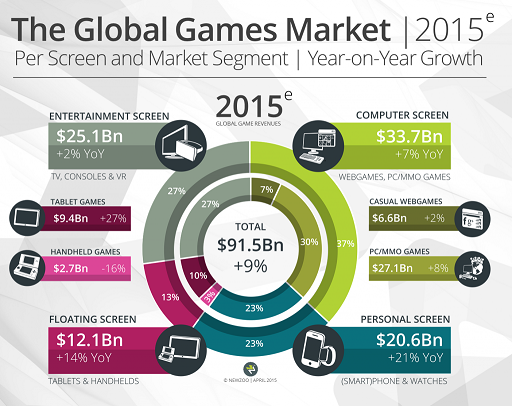
Source: https://businesstech.co.za/news/lifestyle/88472/the-biggest-entertainment-markets-in-the-world/ 
 
Our group decided it would be interesting to do a report on this topic because of our interest in the video game industry. Esports is a rising subsection and we would like to see its current trends. Since we have the general knowledge of the industry as a whole it would be easier to make conclusions based on our findings. 

The goal of this report is to understand the current Esports climate. We will be trying to find patterns between the most successful games in the industry and take a look at the overall scope of the industry. This will be done through visualizing data collected about the numerous Esports titles collected in our datasets.

## Description of Data:

### Dataset Name: Esports Earnings 1998-2021
####  Link: https://www.kaggle.com/rankirsh/esports-earnings

The dataset contains information about various Esports titles and total cash prizes between 1998 to 2021. It organizes the data on a game title basis and contains information about the game (platform, genre, etc) and information about its esports infrastructure (players, total earnings).

Information found in the datasets were found through:

   *  Data found on website [EsportsEarnings.com](https://EsportsEarnings.com)
   *  Data found in [Rushikesh's original dataset](https://www.kaggle.com/rushikeshhiray/esport-earnings) 
   *  [EsportsEarnings.com](https://EsportsEarnings.com) is a website that contains stats about esports prize distribution. This includes filters to divide the earnings by player, country, game, etc.
   
(https://www.kaggle.com/rushikeshhiray/esport-earnings) also uses data from [EsportsEarnings.com](https://EsportsEarnings.com)

#### Data Attributes
Each data attribute is recorded in a per game basis. 

   * __Game__: Name of the game.
   * __ReleaseDate__: Date which the game was released.
   * __Genre__: Genre of the game.
   * __TotalEarnings__: Total prizepool allocated in tournament. *(Some values have values beyond two decimal places because of exchange rate)*
   * __OnlineEarnings__: Total prizepool for tournaments that took place in an online setting.
   * __TotalPlayers__: Amount of players that have recieved some prize *(money)*
   * __TotalTournaments__: Total tournaments that have recorded data 
  
### Dataset Name: Esports Earnings
#### Link: https://www.kaggle.com/jackdaoud/esports-earnings-for-players-teams-by-game

The dataset contains information about Esports players and contains information about their total earnings, the game they play professionally, etc. Organizes the information on a player by player basis and helps us determine information on the game that the given player is known for.

Information found in the dataset were found through:

   *  Data found on website [EsportsEarnings.com](https://EsportsEarnings.com)
   *  Data found in [Rushikesh's original dataset](https://www.kaggle.com/rushikeshhiray/esport-earnings) 
   *  Data found on [Tableau story on Esports.](https://public.tableau.com/app/profile/jack.daoud/viz/eSportsReport/Story)

#### Data Attributes
Each data attributes is recorded on a player basis.

   *  __Playerid__: player id found on [EsportsEarnings.com](https://EsportsEarnings.com)
   * __NameFirst__: First name of given player.
   * __NameLast__: Last name of given player.
   * __CurrentHandle__: In game name.
   * __CountryCode__: Country of origin of player (given in abbreviation. 
   * __TotalUSDPrize__: Total prizepool of player in USD.
   * __Game__: Main game player competes in.
   * __Genre__: Genre of player's main game.
   
   
### Dataset Name: Esports Earnings 1998-2020
#### Link: https://www.kaggle.com/webbery/esports-earnings-19982020

The dataset contains information about a country's tournament success in Esports. Contains information about given countries total earnings, etc. 

Information found in dataset were found through:

   *  data found on website [EsportsEarnings.com](https://EsportsEarnings.com)

#### Data Attributes
Each data attributes is recorded on a country basis. 

   * __Year__: The year the data was collected for
   * __Country__: The country the data is based on
   * __Total Prize Money (Year)__: Total prize money country has obtained in the according to given year
   * __Number of Players__: Numbers of players that represent the given country

## Analysis of the data:

First, we would like to turn our datasets into dataframes so it can easily be read and manipulated. We must import the necessary datasets then convert them into dataframes.

In [70]:
#importing used libraries
#importing used libraries
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt

# if you want to use seaborn
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns


# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv(path):
    collection = []
    with open(path, 'r', encoding='utf8', errors='ignore') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# Datasets

#We create player_country dataframe from the "Top_Countries" dataset
player_country = get_data_csv('Top_Countries.csv')
player_country = pd.DataFrame(player_country)

#We create player_data dataframe from the "highest_earning_players.csv" dataset
player_data = get_data_csv('highest_earning_players.csv')
player_data = pd.DataFrame(player_data)

#We create es_data dataframe from the "GeneralEsportData" dataset
es_data = get_data_csv('GeneralEsportData.csv')
es_data = pd.DataFrame(es_data)

print(es_data)

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
                                             Game ReleaseDate  \
0                                  Age of Empires        1997   
1                               Age of Empires II        1999   
2                              Age of Empires III        2005   
3                               Age of Empires IV        2021   
4                           Age of Empires Online        2011   
..                                            ...         ...   
542                Gears of War: Ultimate Edition        2015   
543                                 Knockout City        2021   
544  Mobile Suit Gundam: Extreme Vs Maxi Boost ON        2016   
545                                 Rogue Company        2020   
546                                The Division 2        2019   

                    Genre TotalEarnings OnlineEarnings TotalPlayers  \
0                Strategy     191181.81      156

### 3.1 Data cleaning: 
Before working with the data, we would first like to clean up our dataframe. 

We would like to remove games that:
- Do not have at least 5 "TotalTournaments" held
- Has a recorded "TotalEarnings" of less than $2000
- That have less than 5 "TotalPlayers"

Doing this will help remove games that have little to no relevence to the broader Esports market giving us a much more accurate data through the removal of potential outliers.

We will remove games that have a "TotalEarnings" of less than $2000:

In [71]:
es_data['TotalEarnings'] = es_data['TotalEarnings'].apply(lambda x: float(x))
es_data = es_data.drop(es_data[es_data['TotalEarnings'] < 2000.0].index).reset_index()
es_data.drop(columns = ['index'], inplace=True)
es_data.count()

Game                396
ReleaseDate         396
Genre               396
TotalEarnings       396
OnlineEarnings      396
TotalPlayers        396
TotalTournaments    396
dtype: int64

We will remove games that have a "TotalTournaments" value of less than 5:

In [72]:
es_data['TotalTournaments'] = es_data['TotalTournaments'].apply(lambda x: int(x))
es_data = es_data.drop(es_data[es_data['TotalTournaments'] < 5].index).reset_index()
es_data.drop(columns = ['index'], inplace=True)
es_data.count()

Game                270
ReleaseDate         270
Genre               270
TotalEarnings       270
OnlineEarnings      270
TotalPlayers        270
TotalTournaments    270
dtype: int64

We will remove games that have less than 5 "TotalPlayers":

In [73]:
es_data['TotalPlayers'] = es_data['TotalPlayers'].apply(lambda x: int(x))
es_data = es_data.drop(es_data[es_data['TotalPlayers'] < 5].index).reset_index()
es_data.drop(columns = ['index'], inplace=True)
es_data.count()

Game                267
ReleaseDate         267
Genre               267
TotalEarnings       267
OnlineEarnings      267
TotalPlayers        267
TotalTournaments    267
dtype: int64

Removing all of these games will be important to keeping our data consistent and remove possible outliers that may skew the data. 

Before cleaning the dataset we had about 540 different games. After removing possible outliers we are left with 265 games cutting out about half of the games that we started with. Though this may seem high it is important that we remove games that have little relevance and can skew our data. 

### 3.2 Data Reformating:

Since we will want to work with statistics it would be a good idea to convert all columns storing numeric values into float type variables within the dataframe. This way we can easily use these in these values when conducting calculations

In [74]:
#Converts all of the numbers in the total earnings column into float this is done become some of the
#data stored in the csv are in scientific notation
def convert_float(earnings):
    return float(earnings)

def convert_int(players):
    return int(players)

print(es_data.count())

es_data["TotalEarnings"]= es_data["TotalEarnings"].apply(convert_float)
es_data["OnlineEarnings"]= es_data["OnlineEarnings"].apply(convert_float)
es_data["TotalPlayers"]= es_data["TotalPlayers"].apply(convert_int)

Game                267
ReleaseDate         267
Genre               267
TotalEarnings       267
OnlineEarnings      267
TotalPlayers        267
TotalTournaments    267
dtype: int64


Deleting the unneeded data from the "highest_earning_players" database. We only need a certain data from this dataset as some of the datapoints over lap with our datasets. We will remove the unneeded data to cleanly work with the needed data.

Similarly to the "GeneralEsportsData" dataset we need to convert the numeric values store to type float variables. This way we can use said numbers in later parts of this report.

In [75]:
#Converts the total prize money into tangible float values
player_data['TotalUSDPrize'] = player_data['TotalUSDPrize'].astype(float)

The same will be done to the data from "Top_Countries" database. Converting the needed numeric values to type float variables.

In [76]:
#turns the monetary value into tangible float values
player_country['Total Prize Money (Year)'] = player_country['Total Prize Money (Year)'].replace('[\$,]', '', regex=True).astype(float)

### 3.3 Pre-Processing: 
We would like to devide our data so it can be used more easily in later questions.


In [77]:
#determing the genres found in the data.
#From this we can see that there are 11 genres that we must comapre.
unique_genre = es_data['Genre'].unique()
unique_genre

array(['Strategy', 'First-Person Shooter',
       'Multiplayer Online Battle Arena', 'Role-Playing Game',
       'Fighting Game', 'Racing', 'Sports', 'Collectible Card Game',
       'Puzzle Game', 'Battle Royale', 'Third-Person Shooter'],
      dtype=object)

## Exploratory Data Analysis

### 4.1 Exploring Genres

To understand the current state of the Esports industry we would like to examine the different genres of the gaming industry. Understanding the popularity of each of the genres in relation with each other. 

We will create two different charts totaling earnings and player count by genre. This will help us determine the popularity of each genre.

In [95]:
#Sums the total earnings and players based on genre of game
genre_earnings_pivot = es_data.pivot_table(index="Genre", values=["TotalEarnings"], aggfunc="sum")
genre_player_pivot = es_data.pivot_table(index="Genre", values=["TotalPlayers"], aggfunc="sum")

print(genre_earnings_pivot,"\n")
print(genre_player_pivot)

                                 TotalEarnings
Genre                                         
Battle Royale                     1.778184e+08
Collectible Card Game             3.894023e+07
Fighting Game                     2.313684e+07
First-Person Shooter              2.837733e+08
Multiplayer Online Battle Arena   4.335103e+08
Puzzle Game                       4.212051e+04
Racing                            8.169891e+06
Role-Playing Game                 6.280703e+06
Sports                            3.162989e+07
Strategy                          7.465249e+07
Third-Person Shooter              5.122481e+06 

                                 TotalPlayers
Genre                                        
Battle Royale                           11847
Collectible Card Game                    4226
Fighting Game                           13365
First-Person Shooter                    42371
Multiplayer Online Battle Arena         16259
Puzzle Game                               126
Racing             

The names of of the given genres are pretty long. Because of this we will abbreviate each of the genres in the dataset according to the legends below
#### Abbreviation Legends
    1)Battle Royale = BR
    2)Collectible Card Game = CCG
    3)Fighting Game = FG
    4)First-Person Shooter = FPS
    5)Multiplayer Online Battle Areana = MOBA
    6)Puzzle Game = PG
    7)Racing = Ra
    8)Role-Playing Game = RPG
    9)Sports = Sp
    10)Strategy = St
    11)Third-Person Shooter = TPS

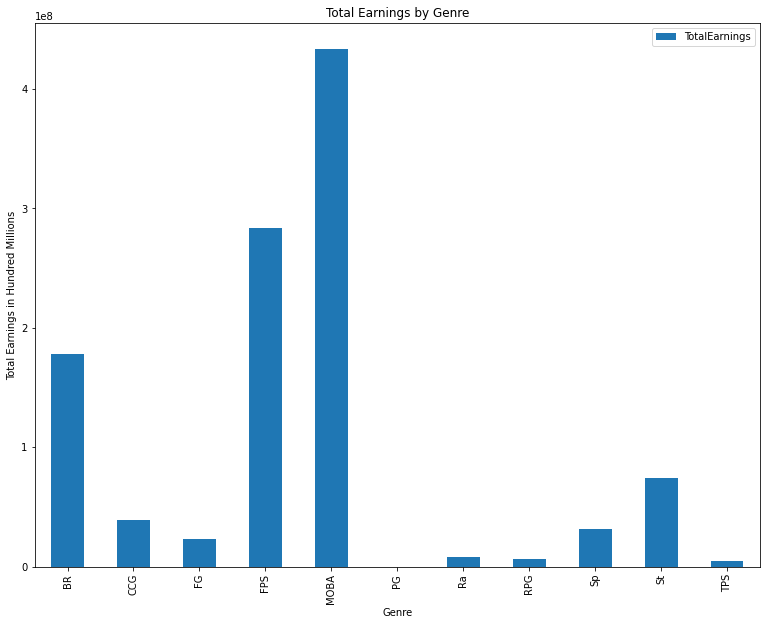

In [97]:
#Change the names of the index to abbreviation so that the x values in the chart are not overlapping 
all_genre = ["BR", "CCG", "FG", "FPS", "MOBA", "PG", "Ra", "RPG", "Sp", "St", "TPS"]
genre_earnings_pivot.index = all_genre
ticks = [0,1,2,3,4,5,6,7,8,9,10]

#Makes line graph for total earnings based on game genre
genre_totalearnings = genre_earnings_pivot.plot(kind='bar',figsize=(13,10), use_index=all_genre,
                                      title="Total Earnings by Genre", ylabel="Total Earnings in Hundred Millions",
                                      xlabel="Genre")

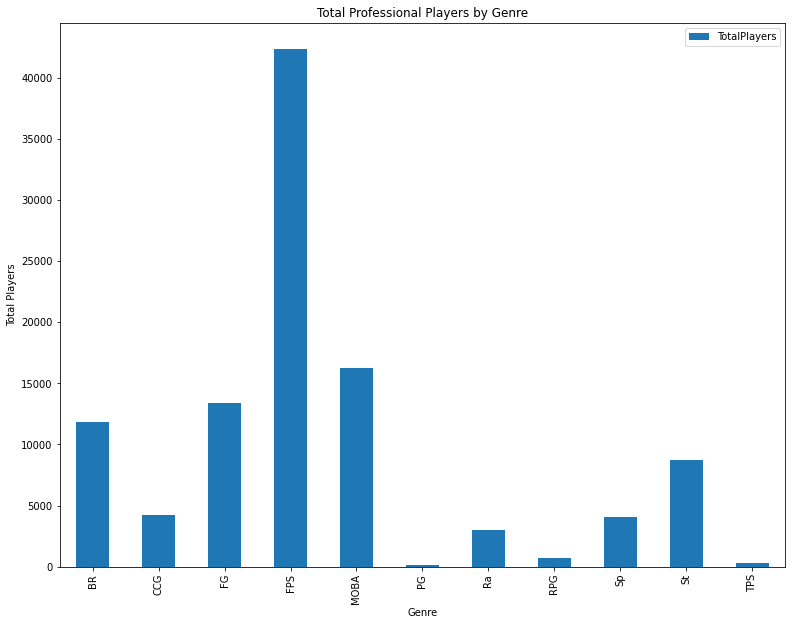

In [98]:
#Change the names of the index to abbreviation so that the x values in the chart are not overlapping 
all_genre = ["BR", "CCG", "FG", "FPS", "MOBA", "PG", "Ra", "RPG", "Sp", "St", "TPS"]
genre_player_pivot.index = all_genre
ticks = [0,1,2,3,4,5,6,7,8,9,10]

#Makes line graph for total players based on game genre
genre_totalplayers = genre_player_pivot.plot(kind='bar', figsize=(13,10), use_index=all_genre,
                                      title="Total Professional Players by Genre", ylabel="Total Players",
                                      xlabel="Genre")

Based on the two graphs we can see that the genres that tend to have the largest amount of earnings seem to be similar to the games with highest player count. The top 3 games with the highest earnings are MOBA, FPS and BR. Each of these genres in terms of total prize distribution is in the hundred millions while the games below it are in the ten millions and below. Granted these are just the prize support we do not know how much money is being generated through third party sources (sponsors, streaming rights, investments, etc). The lowest prize support for any given genre is puzzle games which has a total prize distribution in the 50,000 range. Looking at the total player per genre we see that similar to earnings the top 3 games are FPS, MOBA and FG. FG being the only genre that did not make the top 3 in total earnings. At a glance the two charts seem similar. You can see that the games that tend to have a larger prize distribution also have a larger amount of professional players. The two games that break this trend being FPS and FG. FPS has the largest player count totaling over 40,000 players however the genre only has the second highest prize distribution with about 275,000,000 prize distribution. Comparatively MOBA's have about 17,000 players (less than half of fps) but has the highest total distribtion totaling almost 400000000. This biggest outlier while comparng the two lists of data is the FG genre. The genre has the third largest player base of about 13000 and the sixth largest prize support of about 23000000. This is a huge outlier considering the BR genre have a similar playerbase count but a much larger prize support 173000000, which is over seven times the amount as the fighting game genre. Other than a few outliers it seems to be a clear correlation between the player count of a game and its total earnings.

### 4.2 Comparing data about top 10 games.

In this section of the analysis we will go through the front runners in terms of total player base and earnings and see if there is some sort of correlation between the two.

Finding the top 10 games in terms of overall playerbase: This will show us the total amount of players to have been recorded to earn money from tournaments.

In [81]:
top10_playerbase = es_data.sort_values(by=['TotalPlayers']).tail(10)
top10_playerbase

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
176,Super Smash Bros. Ultimate,2018,Fighting Game,1.833886e+06,1.524813e+06,2204,1534
247,Hearthstone,2014,Collectible Card Game,2.567483e+07,1.848218e+07,2587,941
263,PLAYERUNKNOWNS BATTLEGROUNDS,2017,Battle Royale,3.819115e+07,2.797408e+07,3039,365
94,VALORANT,2020,First-Person Shooter,7.282931e+06,1.682023e+06,3121,510
72,Overwatch,2016,First-Person Shooter,3.172988e+07,1.822746e+07,3570,760
101,Dota 2,2013,Multiplayer Online Battle Arena,2.763939e+08,2.552648e+08,4076,1550
52,Counter-Strike,2000,First-Person Shooter,1.355396e+07,1.284073e+07,4225,1017
259,Fortnite,2017,Battle Royale,1.082858e+08,4.220354e+07,4866,741
104,League of Legends,2009,Multiplayer Online Battle Arena,8.947400e+07,7.939714e+07,7900,2643
54,Counter-Strike: Global Offensive,2012,First-Person Shooter,1.253252e+08,8.093057e+07,14408,5969


Finding the top 10 games in terms of total prizepool: This will show us the total prizepool that has distributed between the competitive life span of a game.

In [82]:
top10_totalearnings = es_data.sort_values(by=['TotalEarnings']).tail(10)
top10_totalearnings

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
82,Rainbow Six Siege,2015,First-Person Shooter,2.043128e+07,1.511655e+07,2153,350
247,Hearthstone,2014,Collectible Card Game,2.567483e+07,1.848218e+07,2587,941
72,Overwatch,2016,First-Person Shooter,3.172988e+07,1.822746e+07,3570,760
97,Arena of Valor,2015,Multiplayer Online Battle Arena,3.508867e+07,3.290437e+07,741,66
23,StarCraft II,2010,Strategy,3.591190e+07,2.934287e+07,2107,6220
263,PLAYERUNKNOWNS BATTLEGROUNDS,2017,Battle Royale,3.819115e+07,2.797408e+07,3039,365
104,League of Legends,2009,Multiplayer Online Battle Arena,8.947400e+07,7.939714e+07,7900,2643
259,Fortnite,2017,Battle Royale,1.082858e+08,4.220354e+07,4866,741
54,Counter-Strike: Global Offensive,2012,First-Person Shooter,1.253252e+08,8.093057e+07,14408,5969
101,Dota 2,2013,Multiplayer Online Battle Arena,2.763939e+08,2.552648e+08,4076,1550


Here we display graphs to better display the total earnings and total player base that each of the top 10 games.

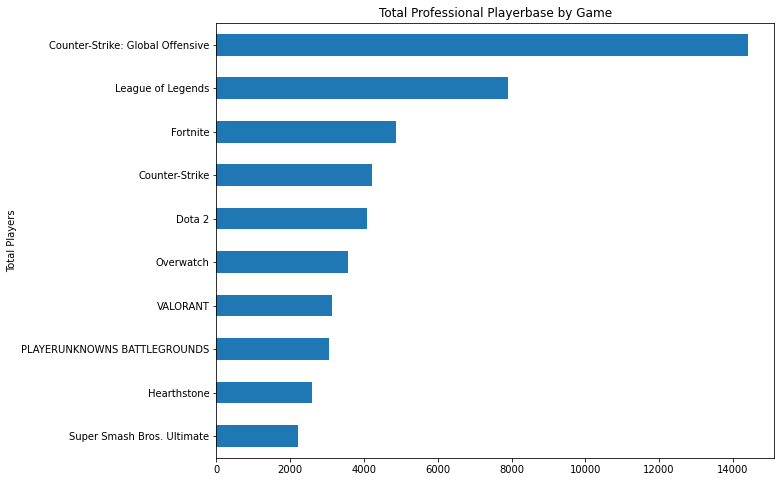

In [83]:
#plotting game by playerbase
top10_playerbase_plot = top10_playerbase.plot(kind="barh", y="TotalPlayers",
                                              x="Game", sort_columns=True,
                                             title = "Total Professional Playerbase by Game",
                                             xlabel="Total Players", legend=False,
                                             figsize = (10,8))

When we look at the games that have the highest total playerbase we can see that the top 2 games have a much larger playercount than the rest of the list. Counter-Strike: Global Offensive and League of Legends have the two largest player bases. When looking at the playercounts for the top 3 games we can see that CS:GO (1st) has over 14000 players, League of Lengends (2nd) has less than half having about 7000 players and Fortnite (3rd) having just as large of a drop with 4000 players. The graph slightly skews right showing that player count is not well distributed between the top 10 games. However other than the top 2 games the next 8 games (Fortnite - Super Smash Bros. Ultimate) do not have as large of a drop off.

One suprising thing to note is that games like Super Smash Bros. Ultimate and Heartstone are 1v1 games which makes their large total playerbase more impressive considering how each match will consist of less players. The other games on this list tend to be team games (Counter-Strike, League, Fortnite) which consist of teams of 3-6 players. Because of this some notable games may not appear on this list such as Starcraft 2, Street Fighter V, etc due to their 1v1 nature

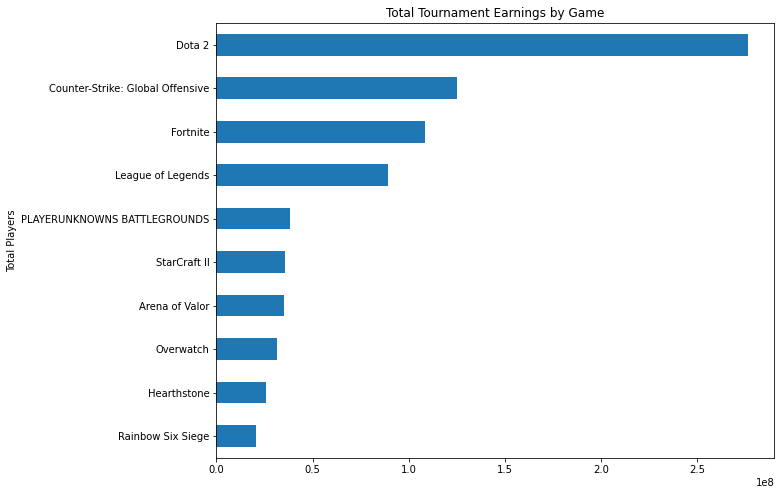

In [99]:
#plotting game by totalearnings
top10_totalearnings_plot= top10_totalearnings.plot(kind="barh", y="TotalEarnings",
                                              x="Game", sort_columns=True,
                                             title = "Total Tournament Earnings by Game",
                                             xlabel="Total Players", legend=False,
                                             figsize = (10,8))

When analysing the top 10 games by earnings we see that Dota 2 (which had the 5th largest playerbase) has the highest total earnings. This is suprising considering that Counter-Strike has about 400% more players than Dota 2, however we can see that Dota 2 has more than double Counter-Strikes total prize distributions. Other than a few of the placements however many of the games in the top earnings also appear in the top player count.

Looking at the earnings we can see that their is a larger spread in distribution between the top 4 games and the other 6. Looking at the top player bases we can see that other than the top 2 the other games steadly drop in players. Looking at the total Earnings we see much larger skew right. Adding the the earnings of rank 5-10 games would total less than the overall earnings of Dota 2. This shows the large difference in total earnings between the top games and the lower top games.

We can conclude that their is some correlation between a games playercount and total earnings however their are deffinitly some notable outliers to this trend that can be further investigated.

### 4.3 Analysing the Distributions between game genres

Now that we see that we have an understanding of the most popular genres and top games in the industry we would like to see if their is some correlation between the two. We believe that it is likely the the top games should line up with the popular genres. Seeing that the top genres (FPS, MOBA and BR) have a larger share over the industry it is likely that we will see these 3 genres appear a few times when looking at the top 10 games.
<br/><br/>


We are calculating the total sum of players and earnings by genre only using the top 10 games:

In [85]:
top10_totalplayers_genre = top10_playerbase.pivot_table(index="Genre", values=["TotalPlayers"], aggfunc="sum", sort=True).sort_values(by=["TotalPlayers"])
top10_totalearnings_genre = top10_totalearnings.pivot_table(index="Genre", values=["TotalEarnings"], aggfunc="sum").sort_values(by=["TotalEarnings"])

print(top10_totalplayers_genre, "\n")
print(top10_totalearnings_genre)

                                 TotalPlayers
Genre                                        
Fighting Game                            2204
Collectible Card Game                    2587
Battle Royale                            7905
Multiplayer Online Battle Arena         11976
First-Person Shooter                    25324 

                                 TotalEarnings
Genre                                         
Collectible Card Game             2.567483e+07
Strategy                          3.591190e+07
Battle Royale                     1.464769e+08
First-Person Shooter              1.774864e+08
Multiplayer Online Battle Arena   4.009566e+08


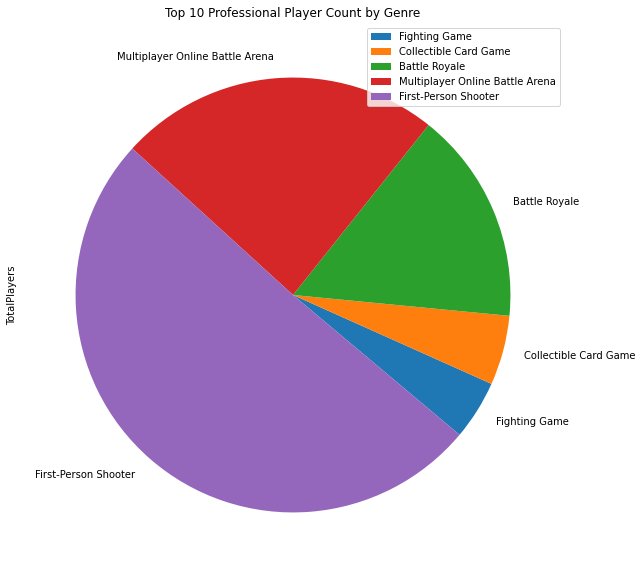

In [86]:
top10_genreplayer_plot = top10_totalplayers_genre.plot(kind = "pie", y="TotalPlayers",
                                                      figsize = (10,10), 
                                                      title = "Top 10 Professional Player Count by Genre", startangle = -40)

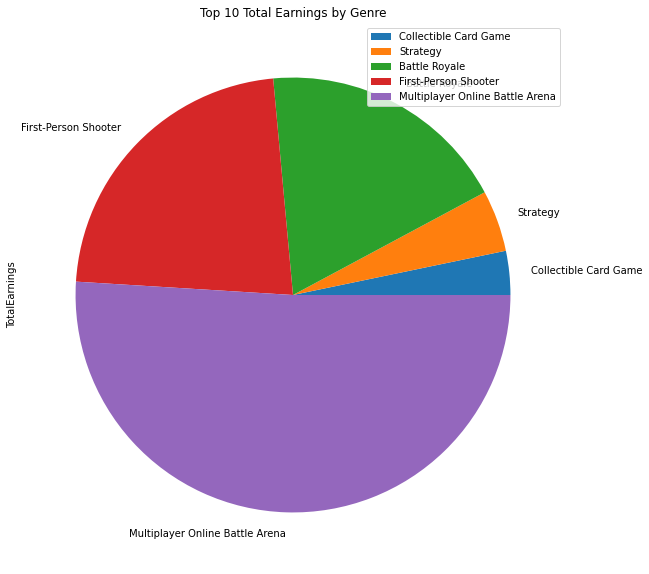

In [87]:
top10_genreearnings_plot = top10_totalearnings_genre.plot(kind = "pie", y="TotalEarnings",
                                                      figsize = (10,10), 
                                                      title = "Top 10 Total Earnings by Genre")

Looking at the pie graphs we see the three largest genres in the top 10 games match the results we see in the top genres. MOBA, FPS and BR clearly dominate the the top 10 games taking well over 75% of the distribution combined. Another point to note is that the next 3 most popular genres found earlier Strategy, CCG and Fighting have also appeared in the top 10 genres.

Another similarity in the results of these pie graphs and our graphs from 4.1 are the domination of FPS in the total player count category and the MOBA in the total earnings category. We see that FPS games in the top 10 account for about half of the player count of the top 10 games. Which is a similar result to the what was observed earlier in the genres total player count. Similarly MOBA accounts for just under 50% of the total earnings which again is similar to the result observed in the genre total earnings chart.

Through this result we can see clear correlation between the top 10 genres and games. This further emphsises the point that the largest Esports titles clearly dominate the market. These games make up a very large portion of the industry and is integral for its success 

### 4.4 Analysis between the top 5 games and the rest

In our last analysis we found that their is large similarity between the charts found in our top 10 games and top genres chart. This shows that the top games most likely had a large impact on the genre chart skewing the results through the top games.

In this section we would like to anylise the top 5 games in terms of earnings and check its total weight compared to the rest of the dataset. Given our prior data we believe it is likely for the top 5 games to make a up a large portion of our data which will be proven through this analysis.
<br/><br/>
Creating dataframes that containg the top 5 games in terms of "TotalEarnings" and the rest of the games:

In [88]:
#grabs the top 5 sports
top5_earnings = es_data.sort_values(by=['TotalEarnings'],ascending = False).head(5)
#filters the data to only the earnings with respect to the titles
top5_earnings = top5_earnings.pivot_table(index="Game", values=["TotalEarnings"], aggfunc="sum")

#grabs the rest of the earnings, excluding the top 5
rest_earnings = es_data.sort_values(by=['TotalEarnings'],ascending = False).tail(len(es_data) - len(top5_earnings))
#filters the data to only the earnings with respect to the titles
rest_earnings = rest_earnings.pivot_table(index="Game", values=["TotalEarnings"], aggfunc="sum")

Sums the total value for the top 5 games and the rest of the games and uses creates a pie chart to compare the two:

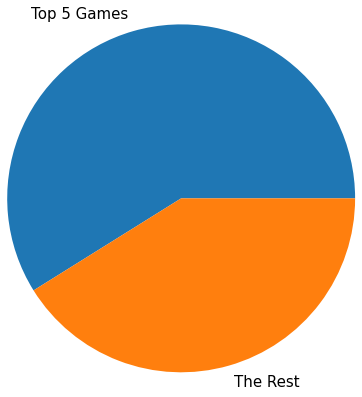

In [89]:
#grabs the sum of both categories
top5_sum = sum(top5_earnings['TotalEarnings'])
rest_sum = sum(rest_earnings['TotalEarnings'])

#graphing the share

cumulative_earnings = [top5_sum, rest_sum]
plt.pie(cumulative_earnings, labels=['Top 5 Games', 'The Rest'], radius = 2, textprops = {"fontsize":15})
plt.show()

Looking at this distribution we can see that our assumptions were correct. We see that the top 5 game's prize disribution were larger than the rest of the total prize distributions combined. These results is no suprised concidering the distribution seen in the previous analysis. The top 5 Esports titles are much more popular in terms of financial support that the other Esports titles. Even amongst the top 5 there is reason to believe that they may still be some large jumps in prizepools between these games. The raise of the industry can show that many of the larger games have become much more popular than others.

### 4.5: Determing Relation Popular game and Release Date

We are using the TotalPlayers, TotalTournaments, and TotalEarnings in order to sort and figure out whether age helps determine the popularity of a game.

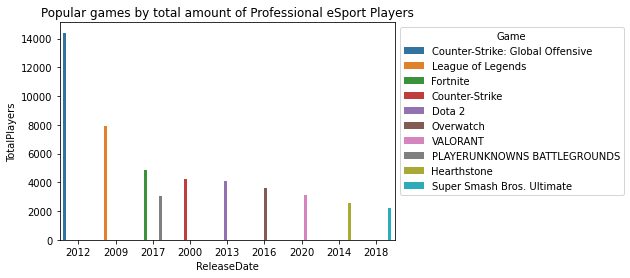

In [90]:
#sorts the data by the "TotalPlayers" column
#and shows the top 10 games in order to see the ReleaseDate of the games
TotalPlayers_top_10 = es_data.sort_values(by=['TotalPlayers'],ascending = False).head(10)
ax = sns.barplot(x = "ReleaseDate", y= "TotalPlayers" , hue = "Game",data = TotalPlayers_top_10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Popular games by total amount of Professional eSport Players")
plt.show()

We sorted by The total amount of players to see the most popular games by looking for the games with the most amount of players. This will give us the opinion of the people competing in the games to see what games they prefer. It looks like games that are newer releases in the 2010s are more present in esports than older releases before 2010s when it comes to the total amount of players.

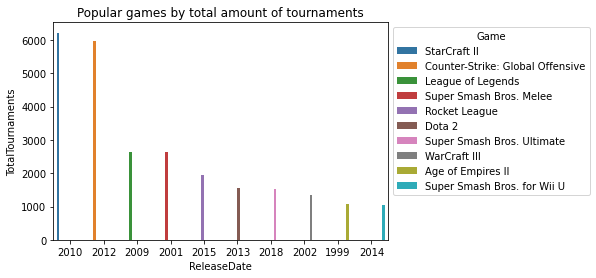

In [91]:
#sorts the data by the "TotalTournaments" column
#and shows the top 10 games in order to see the ReleaseDate of the games
TotalTournaments_top_10 = es_data.sort_values(by=['TotalTournaments'],ascending = False).head(10)
ax = sns.barplot(x = "ReleaseDate", y= "TotalTournaments" , hue = "Game",data = TotalTournaments_top_10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Popular games by total amount of tournaments")
plt.show()

We sorted by The total amount of tournaments held to see the most popular games by looking for games with the highest amount of tournments held. This will give us the opinion on what the fans want to see when it comes to games. It looks like games that are newer releases in the 2010s and 2000s are more present in esports than older releases before 2000s when it comes to the total amount of tournaments.

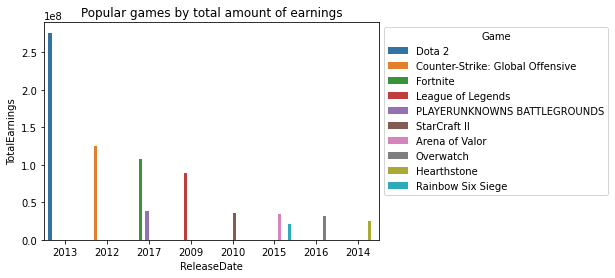

In [92]:
#sorts the data by the "TotalEarnings" column
#and shows the top 10 games in order to see the ReleaseDate of the games
TotalEarnings_top_10 = es_data.sort_values(by=['TotalEarnings'],ascending = False).head(10)
ax = sns.barplot(x = "ReleaseDate", y= "TotalEarnings" , hue = "Game",data = TotalEarnings_top_10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Popular games by total amount of earnings")
plt.show()

We sorted by the total amount of earnings to see the most popular games by looking for the games with the highest total earnings. This will give us the opinion of the organizers and sponsors in what games tournaments they want to support. It looks like games that are newer releases in the 2010s are more present in esports than older releases before 2010s when it comes to the total amount of earnings.

With this data it can be said that the newer the game (around the 2010s) the more popular it is with the esports community. So according to the data the age of the games does affect the popularity of the games in the esports community, the newer the games the more popular it is.

### 4.6 An analysis of the top players and countries

In this analysis we will be looking into the highest earnings players and countries to see if their are any correlation between these and the popular games that we have found in our previous analysis.

It is likely that games like Dota 2 which have a large amount of earnings will likely be popular in the most succesful countries and players.

Looking into the top earning players in the world and the top earning countries (using the new data set):

In [93]:
#Converts prize money values into float
player_data['TotalUSDPrize'] = player_data['TotalUSDPrize'].astype(float)
#sorts by prize
player_data = player_data.sort_values(by='TotalUSDPrize', ascending = False)
player_data.head(20)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
100,3304,Johan,Sundstein,N0tail,dk,6952596.58,Dota 2,Multiplayer Online Battle Arena
101,3822,Jesse,Vainikka,JerAx,fi,6470000.02,Dota 2,Multiplayer Online Battle Arena
102,30451,Anathan,Pham,ana,au,6000411.96,Dota 2,Multiplayer Online Battle Arena
103,2811,Sébastien,Debs,Ceb,fr,5554297.41,Dota 2,Multiplayer Online Battle Arena
104,18897,Topias,Taavitsainen,Topson,fi,5470902.57,Dota 2,Multiplayer Online Battle Arena
105,3145,Kuro,Takhasomi,KuroKy,de,5193382.81,Dota 2,Multiplayer Online Battle Arena
106,14671,Amer,Al-Barkawi,Miracle-,jo,4798043.68,Dota 2,Multiplayer Online Battle Arena
107,12579,Ivan,Ivanov,MinD_ContRoL,bg,4579118.16,Dota 2,Multiplayer Online Battle Arena
108,25335,Maroun,Merhej,GH,lb,4193412.69,Dota 2,Multiplayer Online Battle Arena
109,12133,Lasse,Urpalainen,Matumbaman,fi,3765369.04,Dota 2,Multiplayer Online Battle Arena


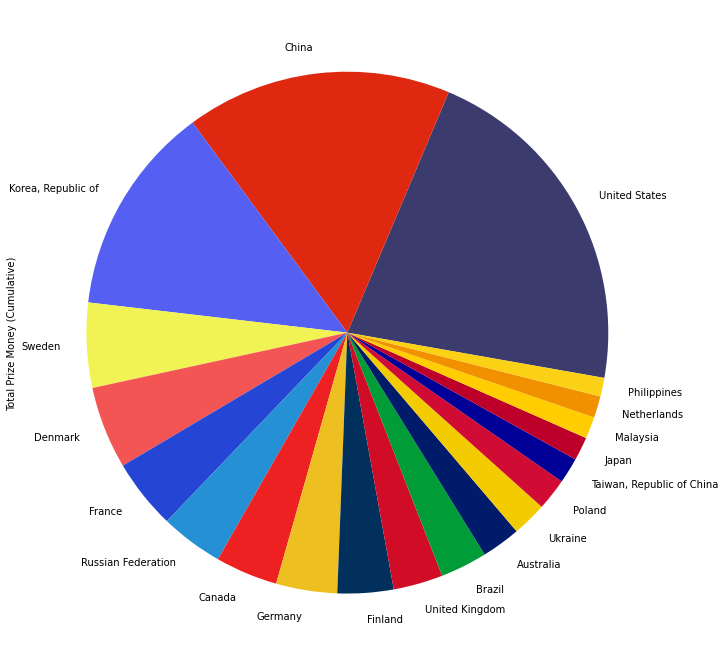

In [101]:
#gathers cumulative values per countries
country_cumulative = player_country.pivot_table(index="Country", values=['Total Prize Money (Year)'], aggfunc="sum")
#sort countries from highest to smallest
country_cumulative = country_cumulative.sort_values(by='Total Prize Money (Year)', ascending = False)
#removes scientific notation and converts to float
country_cumulative['Total Prize Money (Year)'] = country_cumulative['Total Prize Money (Year)'].astype(int)
#renaming the column
country_cumulative = country_cumulative.rename(columns={"Total Prize Money (Year)" : "Total Prize Money (Cumulative)"})
#graphing the data of the top 20 earners
top20 = country_cumulative.head(20)
#color pallete for easy visuals
color_pallete = ['#3c3b6e', '#de2810', '#5560f3', '#f1f355', '#f35555', '#2546d4', '#2590d4', '#ed2121', '#edbf21',
                 '#00305b', '#d00c27', '#009c37', '#001b69', '#f2cb00', '#d10c34','#000096', '#bd0029', '#ffcd00', '#f19100', '#fad115']
#graphing the data
top20_graph = top20.plot(kind = 'pie', y='Total Prize Money (Cumulative)', colors=color_pallete, legend=None ,figsize=(12,12), startangle=-10)

Source: [EsportsEarnings.com](https://EsportsEarnings.com)

Up next is to find the distribution of the players' nationalities with relation to their accumulated winnings.

Based on our findings, the top countries with the most earnings are United States, China (PRC) and South Korea. More than half of the top 20 consists only of these 3 countries. 

The share of the top 20 by continent is as follows:
- Americas - 3 countries
- Eurasia - 9 countries
- Asia - 7 countries
- Oceania - 1 country

## Potential Data Science 

The datasets used in this final report has potential for further analysis.

Datasets involving prize pool data:<br>
Tournament prize pools has diminished in value of significance for latter half of the decade. However, the metric is still useful in terms of the monetary capacity of the game or genre.
- Which games have higher return on investment with regards to potential prize money and game popularity.
- Can be used as a factor in determining team investment decisions.
- Determining competition in a specific game or genre (how many professionals are competiting, has it reached its saturation point, etc.)

Datasets involving player counts:<br>
Data can be used for scouting players, using nationality, games and genres as possible factors for consideration.
- Which players wins the most on tournaments? Does the nationality have a factor?
- Which genres of games are a specific nationality good at?
- Which countries excel at what game and does it correlate to all games of the same genre?

## Conclusion

Through our analysis we have learned that the eSports market is being dominated by the top few games. The majority of the earnings, players and tournaments are being held for the most popular games while the other games are getting much less support. We can also see that similar games seem to hold similar results. Through our analysis we find that the FPS and MOBA genre's are dominating the esports industry as 5 of the most popular titles such as "Counter-Strike: Global Offensive", "League of Legends" and "Dota 2" have larger success drawing in player and prize support. The large monopoly that these games had on the industry was surprising to us. While we knew that these games were very popular we did not expect these games to have such a large share on the industry. The fact that top 5 games held the majority of the prize support is very suprising considering the amount of title's there were in the database.

One specific point we believe this report was lacking was a more in-depth analysis on tournaments. Other than the total amount being held for each game we had very little info on the specifics for each tournament. Being able to see the prize support for the largest tournaments and which games they were being held for would have been great way to analyze the larger gaps in prize support. For example a game like "Super Smash Bros. Melee" has the fourth largest amount of total tournaments. However is no where to be seen in the top prize support per title category. Being able to see specific details for each tournament would allow us to find potential outliers that are skewing the prize support data. One example being Dota 2's "The International 2021" which have some of the largest prize supports in Esports history, having over $40M of prize support. Which is larger than the majority of most titles total earnings. 

Another shortcoming to point out is the lack of a broader scope in terms of Esports in general. Getting a generalized view on the scene would help greatly in further investigations such as player count, viewer counts / engagement, etc. With only the tournament data in hand, we are limited to questions related to solely game tournaments.

Overall we are satisfied with our analysis of the dataset and feel that we can confidently say that the Esports industry is growing. However the top titles have far more influence and larger support than other titles. We can see that games in specific genre's generally have  a better chance in becoming popular eSports titles than others. We believe the data we collect would be useful to understand the current economic enviorment of the eSports industry as well as an understanding of the current landscape of competitve gaming.

## References

The biggest entertainment markets in the world (2015, May 31). Businesstech. https://businesstech.co.za/news/lifestyle/88472/the-biggest-entertainment-markets-in-the-world/ <br>
eSports: Should You Start a Startup? (2020, Oct 23). tableau. https://public.tableau.com/app/profile/jack.daoud/viz/eSportsReport/Story